<a href="https://colab.research.google.com/github/shail0iri/Fashion-Recommendation-System-using-Image-Features/blob/main/Fashion_Recommendation_System_using_Image_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Fashion Recommendation System using Image Features leverages computer vision and machine learning techniques to analyze fashion items’ visual aspects (like colour, texture, and style) and recommend similar or complementary products to users.

In [3]:
from zipfile import ZipFile
import os

zip_file_path = '/content/women fashion.zip'
extraction_directory = '/content/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [4]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg',
  'light brown sleeveless double-breasted blazer paired with matching straight-leg trousers.jpg',
  'off-the-shoulder black ball gown.jpg',
  'fitted black dress that reaches down to mid-calf.jpg',
  'short, white, sleeveless dress with thin straps.jpg',
  'black jumpsuit with a diagonal stripe of glittering material running across the body.jpg',
  'dress with a classic black and white houndstooth pattern.jpg',
  'black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg',
  'long, flowing, pink dress with a sparkly texture.jpg',
  'black off-shoulder dress with belt.jpg'],
 97)

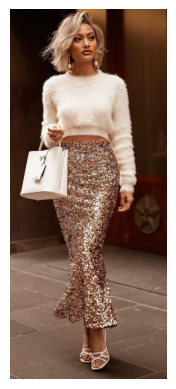

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [6]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/fluffy, possibly faux fur or eyelash knit sweater with a cropped cut top.jpg', '/content/women_fashion/women fashion/light brown sleeveless double-breasted blazer paired with matching straight-leg trousers.jpg', '/content/women_fashion/women fashion/off-the-shoulder black ball gown.jpg', '/content/women_fashion/women fashion/fitted black dress that reaches down to mid-calf.jpg', '/content/women_fashion/women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/women_fashion/women fashion/black jumpsuit with a diagonal stripe of glittering material running across the body.jpg', '/content/women_fashion/women fashion/dress with a classic black and white houndstooth pattern.jpg', '/content/women_fashion/women fashion/black double-breasted blazer with gold buttons, paired with a mid-length skirt.jpg', '/content/women_fashion/women fashion/long, flowing, pink dress with a sparkly texture.jpg', '/content/women_fashion/women fashion/bla

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━

In [8]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


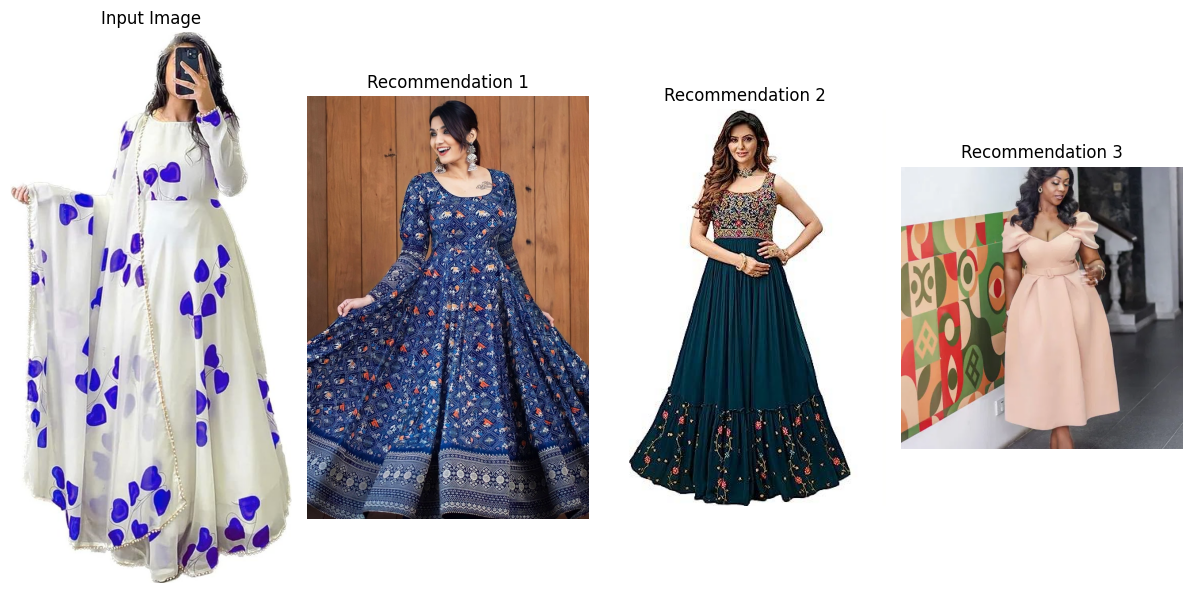

In [12]:
input_image_path = '/content/women_fashion/women fashion/Anarkali suit with a modern twist.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)